In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [10]:
from Transformer_RPN.logger import logging

In [13]:
logger = logging.getLogger(__name__)

In [14]:
logger.info("Checking logger setup")

# Data Loaders

In [1]:
import os
import tqdm

In [2]:
os.chdir('../')

In [3]:
list = [os.path.join('Data/Strawberry data/strawberry_labels', dir, i) for dir in os.listdir('Data/Strawberry data/strawberry_labels') for i in os.listdir(os.path.join('Data/Strawberry data/strawberry_labels', dir))]

In [4]:
list

['Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot192.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot94.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot225.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot83.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot134.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot99.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot213.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot151.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot24.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot198.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot155.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot194.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot59.xml',
 'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot54.xml',
 'Data/Strawberry data/str

In [5]:
img_info = {}

In [3]:
import xml.etree.ElementTree as ET

In [7]:
list[0]

'Data/Strawberry data/strawberry_labels/leaf_spot/leaf_spot192.xml'

In [4]:
img_info['img_id'] = os.path.basename(list[0]).split('.xml')[0]

TypeError: expected str, bytes or os.PathLike object, not GenericAlias

In [9]:
img_info['img_id']

'leaf_spot192'

In [10]:
img_info['filename'] = os.path.join('Data/Strawberry data/strawberry_data'+'/leaf_spot', '{}.jpg'.format(img_info['img_id']))

In [11]:
img_info['filename']

'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot192.jpg'

In [12]:
anotation_info = ET.parse(list[0])

In [13]:
root = anotation_info.getroot()

In [14]:
size = root.find('size')

In [15]:
size

<Element 'size' at 0x7489d44559e0>

In [16]:
width = int(size.find('width').text)
height = int(size.find('height').text)

In [33]:
width

269

In [34]:
height

282

In [17]:
img_info['width'] = width
img_info['height'] = height

In [18]:
img_info

{'img_id': 'leaf_spot192',
 'filename': 'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot192.jpg',
 'width': 269,
 'height': 282}

In [19]:
detections = []

In [20]:
obj = anotation_info.findall('object')

In [21]:
label = obj[0].find('name').text

In [22]:
classes = ['angular_leafspot', 'anthracnose_fruit_rot', 'gray_mold', 'leaf_scorch', 'leaf_spot']

In [23]:
label2idx = {classes[idx]: idx for idx in range(len(classes))}

In [24]:
label2idx

{'angular_leafspot': 0,
 'anthracnose_fruit_rot': 1,
 'gray_mold': 2,
 'leaf_scorch': 3,
 'leaf_spot': 4}

In [25]:
label = label2idx[label]

In [26]:
boundingbox_info = obj[0].find('bndbox')

In [27]:
bbox = [
                int(float(boundingbox_info.find('xmin').text))-1,
                int(float(boundingbox_info.find('ymin').text))-1,
                int(float(boundingbox_info.find('xmax').text))-1,
                int(float(boundingbox_info.find('ymax').text))-1
            ]

In [28]:
bbox

[37, 0, 63, 22]

In [29]:
det = {}

In [30]:
det['label'] = label
det['bbox'] = bbox

In [31]:
det

{'label': 4, 'bbox': [37, 0, 63, 22]}

In [33]:
detections

[{'label': 4, 'bbox': [37, 0, 63, 22]}]

In [5]:
from PIL import Image

In [6]:
from tqdm import tqdm

In [7]:
class LoadData:
    def __init__(self, img_dir, xml_dir, label2idx):
        self.img_dir = img_dir
        self.xml_dir = xml_dir
        self.label2idx = label2idx
        self.img_infos = []

    def load(self):
        xml_files = [os.path.join(self.xml_dir, dir, file) for dir in os.listdir(self.xml_dir) for file in os.listdir(os.path.join(self.xml_dir, dir))]
        for file in tqdm(xml_files, desc='Processing XML files'):
            img_info = {}
            img_info['id'] = os.path.basename(file).split('.xml')[0]
            xml_info = ET.parse(file)
            root = xml_info.getroot()
            size = root.find('size')
            folder = file.split('/')[3]
            img_info['image'] = os.path.join(self.img_dir, folder,'{}.jpg'.format(img_info['id']))
            width = int(size.find('width').text)
            height = int(size.find('height').text)
            img_info['height'] = height
            img_info['width'] = width
            detections = []
        

            for obj in xml_info.findall('object'):
                det = {}
                label = label2idx[obj.find('name').text]
                if obj.find('name').text == 'leaf_blight':
                    print(img_info['id'])
                bbox_info = obj.find('bndbox')
                bbox = [
                    int(float(bbox_info.find('xmin').text))-1,
                    int(float(bbox_info.find('ymin').text))-1,
                    int(float(bbox_info.find('xmax').text))-1,
                    int(float(bbox_info.find('ymax').text))-1
                ]
                det['label'] = label
                det['bbox'] = bbox
                detections.append(det)
            
            img_info['detections'] = detections
            self.img_infos.append(img_info)
        return self.img_infos

In [8]:
img_dir = r'Data/Strawberry data/strawberry_data'
xml_dir = r'Data/Strawberry data/strawberry_labels'
classes = ['angular_leafspot', 'anthracnose_fruit_rot', 'gray_mold', 'leaf_scorch', 'leaf_spot']
classes = sorted(classes)
classes = ['background'] + classes
label2idx = {classes[idx]: idx for idx in range(len(classes))}
idx2label = {idx: classes[idx] for idx in range(len(classes))}


In [48]:
classes

['background',
 'angular_leafspot',
 'anthracnose_fruit_rot',
 'gray_mold',
 'leaf_scorch',
 'leaf_spot']

In [4]:
idx2label

{0: 'background',
 1: 'angular_leafspot',
 2: 'anthracnose_fruit_rot',
 3: 'gray_mold',
 4: 'leaf_scorch',
 5: 'leaf_spot'}

In [ ]:
label2idx

{'background': 0,
 'angular_leafspot': 1,
 'anthracnose_fruit_rot': 2,
 'gray_mold': 3,
 'leaf_scorch': 4,
 'leaf_spot': 5}

In [40]:
os.chdir('../')

In [9]:
ld = LoadData(img_dir=img_dir, xml_dir=xml_dir, label2idx=label2idx)
img_infos = ld.load()

Processing XML files:   0%|          | 0/941 [00:00<?, ?it/s]

Processing XML files: 100%|██████████| 941/941 [00:00<00:00, 10143.04it/s]


In [10]:
img_infos

[{'id': 'leaf_spot192',
  'image': 'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot192.jpg',
  'height': 282,
  'width': 269,
  'detections': [{'label': 5, 'bbox': [37, 0, 63, 22]},
   {'label': 5, 'bbox': [33, 29, 61, 50]},
   {'label': 5, 'bbox': [22, 79, 43, 98]},
   {'label': 5, 'bbox': [108, 64, 134, 93]},
   {'label': 5, 'bbox': [66, 86, 123, 125]},
   {'label': 5, 'bbox': [26, 106, 76, 133]},
   {'label': 5, 'bbox': [42, 160, 74, 185]},
   {'label': 5, 'bbox': [73, 144, 107, 172]},
   {'label': 5, 'bbox': [98, 130, 128, 156]},
   {'label': 5, 'bbox': [167, 103, 188, 136]},
   {'label': 5, 'bbox': [199, 139, 221, 161]},
   {'label': 5, 'bbox': [83, 187, 134, 226]},
   {'label': 5, 'bbox': [138, 189, 176, 222]},
   {'label': 5, 'bbox': [197, 198, 235, 224]},
   {'label': 4, 'bbox': [137, 42, 153, 60]},
   {'label': 4, 'bbox': [161, 26, 168, 35]}]},
 {'id': 'leaf_spot94',
  'image': 'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot94.jpg',
  'height': 233,
  'width

In [11]:
img_infos

[{'id': 'leaf_spot192',
  'image': 'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot192.jpg',
  'height': 282,
  'width': 269,
  'detections': [{'label': 5, 'bbox': [37, 0, 63, 22]},
   {'label': 5, 'bbox': [33, 29, 61, 50]},
   {'label': 5, 'bbox': [22, 79, 43, 98]},
   {'label': 5, 'bbox': [108, 64, 134, 93]},
   {'label': 5, 'bbox': [66, 86, 123, 125]},
   {'label': 5, 'bbox': [26, 106, 76, 133]},
   {'label': 5, 'bbox': [42, 160, 74, 185]},
   {'label': 5, 'bbox': [73, 144, 107, 172]},
   {'label': 5, 'bbox': [98, 130, 128, 156]},
   {'label': 5, 'bbox': [167, 103, 188, 136]},
   {'label': 5, 'bbox': [199, 139, 221, 161]},
   {'label': 5, 'bbox': [83, 187, 134, 226]},
   {'label': 5, 'bbox': [138, 189, 176, 222]},
   {'label': 5, 'bbox': [197, 198, 235, 224]},
   {'label': 4, 'bbox': [137, 42, 153, 60]},
   {'label': 4, 'bbox': [161, 26, 168, 35]}]},
 {'id': 'leaf_spot94',
  'image': 'Data/Strawberry data/strawberry_data/leaf_spot/leaf_spot94.jpg',
  'height': 233,
  'width

In [12]:
from torch.utils.data.dataset import Dataset

In [13]:
import random

In [14]:
import torchvision

In [15]:
import torch

In [16]:
class CustomDataset(Dataset):
    def __init__(self, split, img_dir, xml_dir, label2idx, target_size=(224, 224)):
        self.split = split
        self.img_dir = img_dir
        self.xml_dir = xml_dir
        self.target_size = target_size  # Resize target (224, 224)
        self.images_info = LoadData(self.img_dir, self.xml_dir, label2idx).load()
        self.transform = torchvision.transforms.Compose([
            torchvision.transforms.Resize(self.target_size),  # Resize images
            torchvision.transforms.ToTensor()  # Convert to tensor
        ])
    
    def __len__(self):
        return len(self.images_info)
    
    def __getitem__(self, index):
        img_info = self.images_info[index]
        img = Image.open(img_info['image'])
        
        # Store original dimensions
        original_w, original_h = img.size
        target_w, target_h = self.target_size
        
        # Random horizontal flip (for training only)
        to_flip = False
        if self.split == 'train' and random.random() < 0.5:
            to_flip = True
            img = img.transpose(Image.FLIP_LEFT_RIGHT)

        # Resize the image
        img_tensor = self.transform(img)
        
        # Scale bounding boxes to new image size
        targets = {}
        targets['bboxes'] = []
        targets['labels'] = torch.as_tensor([d['label'] for d in img_info['detections']], dtype=torch.int64)

        scale_x = target_w / original_w
        scale_y = target_h / original_h

        for detection in img_info['detections']:
            x1, y1, x2, y2 = detection['bbox']

            # Flip bounding box if image is flipped
            if to_flip:
                x1, x2 = original_w - x2, original_w - x1

            # Scale bbox to new dimensions
            x1 = int(x1 * scale_x)
            y1 = int(y1 * scale_y)
            x2 = int(x2 * scale_x)
            y2 = int(y2 * scale_y)

            targets['bboxes'].append([x1, y1, x2, y2])

        targets['bboxes'] = torch.as_tensor(targets['bboxes'], dtype=torch.float32)

        return img_tensor, targets, img_info['image']

In [17]:
ds = CustomDataset('train', img_dir, xml_dir, label2idx)

Processing XML files: 100%|██████████| 941/941 [00:00<00:00, 6555.94it/s]


In [18]:
ds[4][0].shape

torch.Size([3, 224, 224])

In [19]:
ds[5][0].shape

torch.Size([3, 224, 224])

In [20]:
from torch.utils.data.dataloader import DataLoader

In [21]:
train_dataset = DataLoader(ds,batch_size=1,shuffle=True,num_workers=4)

In [41]:
train_dataset.dataset.__sizeof__

<function CustomDataset.__sizeof__()>

In [22]:
for image, target, _ in tqdm(train_dataset):
    print(target['bboxes'])
    print(image.shape)
    image = image
    break
    


  0%|          | 0/941 [00:00<?, ?it/s]

tensor([[[ 43., 134.,  53., 150.],
         [ 50., 117.,  55., 127.],
         [ 45.,  96.,  53., 108.],
         [ 88.,  75.,  95.,  85.],
         [ 86., 118.,  91., 126.],
         [135.,  64., 141.,  76.],
         [111.,  28., 117.,  35.],
         [104.,   4., 111.,  15.],
         [ 89.,  28.,  97.,  42.],
         [180., 120., 185., 130.],
         [135., 132., 143., 141.],
         [137., 168., 143., 182.],
         [167., 180., 174., 194.]]])
torch.Size([1, 3, 224, 224])


In [23]:
image[0].shape

torch.Size([3, 224, 224])

In [42]:
image[0].shape

torch.Size([3, 224, 224])

In [24]:
import numpy as np

In [25]:
def sliding_window_patches(image_tensor, patch_size=(16, 16), stride=(16, 16)):
    _, h, w = image_tensor.shape
    ph, pw = patch_size
    stride_h, stride_w = stride

    # Collect patches
    patches = [
        image_tensor[:, i:i + ph, j:j + pw]
        for i in range(0, h - ph + 1, stride_h)
        for j in range(0, w - pw + 1, stride_w)
    ]

    return torch.stack(patches)  # Shape: (num_patches, C, ph, pw)


In [26]:
patches = sliding_window_patches(image_tensor=image[0])

In [27]:
patches[2].shape

torch.Size([3, 16, 16])

In [33]:
patches.shape

torch.Size([196, 3, 16, 16])

In [ ]:
# flatten step
x_c = patches.reshape(-1, 3*16*16)

In [100]:
x_c.shape

torch.Size([196, 768])

In [28]:
from torch import nn

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
class SelfAttention(nn.Module):
  def __init__(self,embedding_dim=768, key_dim=64):
    super().__init__()
    self.embedding_dim = embedding_dim
    self.key_dim = key_dim
    self.W = nn.Parameter(torch.randn(embedding_dim, 3 * key_dim))
  def forward(self,x):
    key_dim = self.key_dim
    qkv = torch.matmul(x,self.W)
    q = qkv[:,:,:key_dim]
    k = qkv[:,:,key_dim:key_dim*2 ]
    v = qkv[:,:,key_dim*2:]
    k_T = torch.transpose(k,-2,-1)
    dot_products = torch.matmul(q,k_T)
    scaled_dot_products = dot_products / np.sqrt(key_dim)
    attention_weights = F.softmax(scaled_dot_products,dim=1)
    weighted_values = torch.matmul(attention_weights,v)
    return weighted_values

In [38]:
class MultiHeadSelfAttention(nn.Module):
  def __init__(self, embedding_dim = 768, num_heads = 12):
    super().__init__()
    self.embeddding_dim = embedding_dim
    self.num_heads = num_heads
    assert embedding_dim % num_heads == 0  #768 % 12
    self.key_dim = embedding_dim // num_heads
    self.attention_list = [SelfAttention(embedding_dim, self.key_dim) for _ in range(num_heads)]
    self.multihead_attention = nn.ModuleList(self.attention_list)
    self.W = nn.Parameter(torch.randn(num_heads * self.key_dim, embedding_dim))
  def forward(self,x):
    attention_scores = [ attention(x) for attention in self.multihead_attention]
    Z = torch.cat(attention_scores, -1)
    attention_score = torch.matmul(Z, self.W)
    return attention_score


In [33]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self,embedding_dim=768,hidden_dim=3072):
    super().__init__()
    self.mlp=nn.Sequential(
                        nn.Linear(embedding_dim,hidden_dim),
                        nn.GELU(),
                        nn.Linear(hidden_dim,embedding_dim)

                      )
  def forward(self,x):
    x=self.mlp(x)
    return x

In [37]:
class TransformerEncoder(nn.Module):
  def __init__(self,embedding_dim=768,num_heads=12,hidden_dim=3072,dropout_prob=0.1):
    super().__init__()
    self.MSA = MultiHeadSelfAttention(embedding_dim,num_heads)
    self.MLP = MultiLayerPerceptron(embedding_dim,hidden_dim)
    self.layer_norm1 = nn.LayerNorm(embedding_dim)
    self.layer_norm2 = nn.LayerNorm(embedding_dim)
    self.dropout1 = nn.Dropout(p=dropout_prob)
    self.dropout2 = nn.Dropout(p=dropout_prob)
    self.dropout3 = nn.Dropout(p=dropout_prob)
  def forward(self,x):
    out_1 = self.dropout1(x)
    out_2 = self.layer_norm1(out_1)
    msa_out = self.MSA(out_2)
    out_3 = self.dropout2(msa_out)
    res_out = x +  out_3
    out_4 = self.layer_norm2(res_out)
    mlp_out = self.MLP(out_4)
    out_5 = self.dropout3(mlp_out)
    output = res_out + out_5
    return output

In [ ]:
class VisionTransformer(nn.Module):
  def __init__(self,patch_size=16,image_size=224,channel_size=3,num_layers=12,embedding_dim=768,num_heads=12,
               hidden_dim=3072,dropout_prob=0.1,num_classes=10):
    super().__init__()
    self.patch_size = patch_size
    self.channel_size = channel_size
    self.num_layers = num_layers
    self.embedding_dim = embedding_dim
    self.num_heads = num_heads
    self.hidden_dim = hidden_dim
    self.dropout_prob = dropout_prob
    self.num_classes = num_classes
    self.dimension = embedding_dim

    self.num_patches = int(image_size**2 / patch_size**2)
    self.W = nn.Parameter(torch.randn(patch_size *patch_size *channel_size, embedding_dim))
    self.pos_embedding = nn.Parameter(torch.randn(self.num_patches + 1, embedding_dim))
    self.class_token = nn.Parameter(torch.randn(1, self.dimension))

    transformer_encoder_list = [
        TransformerEncoder(embedding_dim, num_heads, hidden_dim, dropout_prob)
        for _ in range(num_layers)
    ]
    self.transformer_encoder_layers = nn.Sequential(*transformer_encoder_list)

  def forward(self,x):
    P,C = self.patch_size,self.channel_size
    #[batch_size,channels,hight,width]
    patches = x.unfold(1,C,C).unfold(2,P,P).unfold(3,P,P)
    patches = patches.contiguous().view(patches.size(0),-1,C*P*P).float()

    patch_embeddings = torch.matmul(patches,self.W)

    batch_size = patch_embeddings.shape[0]
    patch_embeddings = torch.cat((self.class_token.repeat(batch_size,1,1),patch_embeddings),1)

    patch_embeddings = patch_embeddings + self.pos_embedding
    transformer_encoder_output = self.transformer_encoder_layers(patch_embeddings)
    
   
    return transformer_encoder_output

In [40]:
transformer_model = VisionTransformer()

In [44]:
image.shape

torch.Size([1, 3, 224, 224])

In [45]:
featuremap = transformer_model(image)

In [46]:
featuremap.shape

torch.Size([1, 197, 768])

In [47]:
featuremap

tensor([[[-2492.6687, 19349.9375, 47956.7617,  ...,  -790.3325,
           5401.7700,   947.5953],
         [ 8177.0645, -4268.0190, -2023.9888,  ...,  2493.8975,
           1249.5649,  -615.1942],
         [-6744.3745,  -812.2184,  1882.3687,  ...,  1295.2991,
           1474.1208,   904.7235],
         ...,
         [-3429.1414, -2194.6572,   190.5432,  ..., -1740.5527,
           3146.2795,  -296.2127],
         [  287.4189, -1521.4171,  1793.4272,  ..., -3142.3281,
          -2261.0381,  3752.7590],
         [ 3170.3879,  3860.8557, -1424.2169,  ...,  -660.3699,
          -2747.8911, -4591.7456]]], grad_fn=<SliceBackward0>)

In [48]:
from matplotlib import cm
im = Image.fromarray(np.uint8(cm.gist_earth(featuremap[0].detach().numpy())*255))

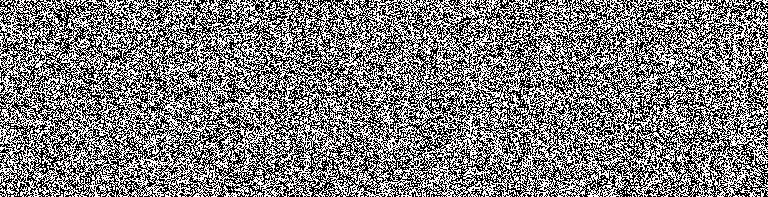

In [50]:
im

#RPN